# Light AutoML (LAMA)

In [1]:
!pip install -U lightautoml

     |████████████████████████████████| 296 kB 7.6 MB/s 
     |████████████████████████████████| 9.5 MB 59.4 MB/s 
     |████████████████████████████████| 804.1 MB 2.6 kB/s 
     |████████████████████████████████| 308 kB 52.8 MB/s 
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 1.2 MB 37.8 MB/s 
     |████████████████████████████████| 215 kB 66.6 MB/s 
     |████████████████████████████████| 425 kB 65.0 MB/s 
     |████████████████████████████████| 2.8 MB 47.3 MB/s 
     |████████████████████████████████| 81 kB 8.3 MB/s 
     |████████████████████████████████| 210 kB 52.7 MB/s 
     |████████████████████████████████| 78 kB 4.3 MB/s 
     |████████████████████████████████| 113 kB 63.4 MB/s 
     |████████████████████████████████| 146 kB 67.6 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
     |████████████████████████████████| 21.0 MB 1.5 MB/s 
     |████████████████████████████████| 23.2 MB 1.3 MB/s 
     |██████████████

In [6]:
# Standard python libraries
import logging
import os
import time
import requests
import seaborn as sns
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
logging.basicConfig(format='[%(asctime)s] (%(levelname)s): %(message)s', level=logging.INFO)

# Installed libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Imports from our package
# from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
# from lightautoml.tasks import Task


In [8]:
N_THREADS = 4 # threads cnt for lgbm and linear models
N_FOLDS = 5 # folds cnt for AutoML
RANDOM_STATE = 42 # fixed random state for various reasons
TEST_SIZE = 0.2 # Test size for metric check
TIMEOUT = 600 # Time in seconds for automl run
TARGET_NAME = 'Selling_Price' # Target column name

In [4]:
train_data = pd.read_csv('/content/car data.csv')
train_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0


In [5]:
train_data.shape

(301, 9)

In [6]:
train_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    2
Kms_Driven       2
Fuel_Type        1
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

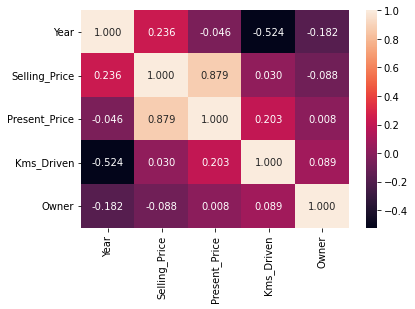

In [7]:
sns.heatmap(train_data.corr(), annot=True, fmt='.3f')

In [8]:
X = train_data.drop([TARGET_NAME], axis=1)
y = train_data[TARGET_NAME]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=88888888)

In [10]:
%%time

task = Task('reg', )

CPU times: user 1.28 ms, sys: 45 µs, total: 1.33 ms
Wall time: 1.21 ms


In [11]:
%%time

roles = {'target': TARGET_NAME,}

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.7 µs


In [12]:
train_df = X_train
train_df[TARGET_NAME] = y_train
train_df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
150,TVS Apache RTR 180,2011,0.826,6000.0,Petrol,Individual,Manual,0,0.50
8,ciaz,2016,8.890,20273.0,Diesel,Dealer,Manual,0,8.75
4,swift,2014,6.870,42450.0,Diesel,Dealer,Manual,0,4.60
139,Bajaj Avenger 220 dtsi,2015,0.950,16600.0,Petrol,Individual,Manual,0,0.60
58,etios g,2014,6.800,39485.0,Petrol,Dealer,Manual,1,4.10


In [13]:
test_df = X_test
test_df[TARGET_NAME] = y_test
test_df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
55,corolla altis,2009,15.04,70000.0,Petrol,Dealer,Automatic,0,3.60
151,Hero Passion X pro,2016,0.55,31000.0,Petrol,Individual,Manual,0,0.50
160,Bajaj Avenger Street 220,2011,0.95,24000.0,Petrol,Individual,Manual,0,0.45
180,Hero Honda Passion Pro,2012,0.51,60000.0,Petrol,Individual,Manual,0,0.30
94,corolla altis,2008,22.78,89000.0,Petrol,Dealer,Automatic,0,4.00


In [14]:
%%time 

automl = TabularAutoML(task = task, 
                       timeout = TIMEOUT,
                       cpu_limit = N_THREADS,
                       reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
                      )
oof_pred = automl.fit_predict(train_df, roles = roles)
# logging.info('oof_pred:\n{}\nShape = {}'.format(oof_pred, oof_pred.shape))

Выходные данные были обрезаны до нескольких последних строк (5000).
[2022-05-02 19:42:14,311] (DEBUG): 667:	learn: 0.3967641	test: 1.5363161	best: 1.5363161 (667)	total: 321ms	remaining: 639ms
[2022-05-02 19:42:14,312] (DEBUG): 668:	learn: 0.3965973	test: 1.5355826	best: 1.5355826 (668)	total: 321ms	remaining: 638ms
[2022-05-02 19:42:14,314] (DEBUG): 669:	learn: 0.3962963	test: 1.5352219	best: 1.5352219 (669)	total: 321ms	remaining: 638ms
[2022-05-02 19:42:14,315] (DEBUG): 670:	learn: 0.3958222	test: 1.5353633	best: 1.5352219 (669)	total: 322ms	remaining: 637ms
[2022-05-02 19:42:14,316] (DEBUG): 671:	learn: 0.3951709	test: 1.5351724	best: 1.5351724 (671)	total: 322ms	remaining: 636ms
[2022-05-02 19:42:14,318] (DEBUG): 672:	learn: 0.3949806	test: 1.5349324	best: 1.5349324 (672)	total: 322ms	remaining: 635ms
[2022-05-02 19:42:14,320] (DEBUG): 673:	learn: 0.3941995	test: 1.5353287	best: 1.5349324 (672)	total: 322ms	remaining: 634ms
[2022-05-02 19:42:14,321] (DEBUG): 674:	learn: 0.3940686	

CPU times: user 6min 24s, sys: 35.8 s, total: 7min
Wall time: 7min 14s


CPU times: user 87.5 ms, sys: 2.9 ms, total: 90.4 ms
Wall time: 96.9 ms


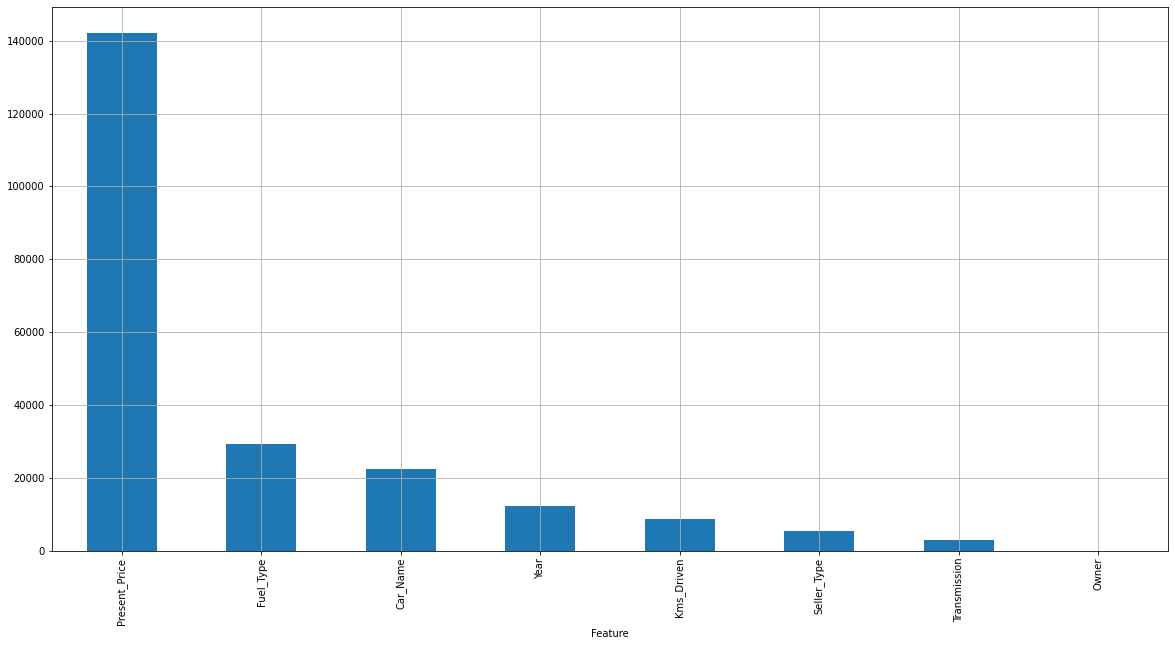

In [15]:
%%time

# Fast feature importances calculation
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (20, 10), grid = True)

In [16]:
%%time

test_pred = automl.predict(test_df) # drop y

logging.info('Check scores for test data...')
logging.info('MAE score: {}'.format(mean_absolute_error(test_df[TARGET_NAME].values, test_pred.data[:, 0])))
logging.info('MSE score: {}'.format(mean_squared_error(test_df[TARGET_NAME].values, test_pred.data[:, 0])))
logging.info('MedAE score: {}'.format(median_absolute_error(test_df[TARGET_NAME].values, test_pred.data[:, 0])))
logging.info('R2 score: {}'.format(r2_score(test_df[TARGET_NAME].values, test_pred.data[:, 0])))

[2022-05-02 20:10:41,038] (INFO): Check scores for test data...
[2022-05-02 20:10:41,040] (INFO): MAE score: 0.829936069377133
[2022-05-02 20:10:41,049] (INFO): MSE score: 1.3869212805008564
[2022-05-02 20:10:41,054] (INFO): MedAE score: 0.5823495864868162
[2022-05-02 20:10:41,056] (INFO): R2 score: 0.9081512185143081


CPU times: user 343 ms, sys: 9.99 ms, total: 353 ms
Wall time: 370 ms


In [17]:
logging.info('Check scores for train data...')
logging.info('MAE score: {}'.format(mean_absolute_error(train_df[TARGET_NAME].values, oof_pred.data[:, 0])))
logging.info('MSE score: {}'.format(mean_squared_error(train_df[TARGET_NAME].values, oof_pred.data[:, 0])))
logging.info('MedAE score: {}'.format(median_absolute_error(train_df[TARGET_NAME].values, oof_pred.data[:, 0])))
logging.info('R2 score: {}'.format(r2_score(train_df[TARGET_NAME].values, oof_pred.data[:, 0])))

[2022-05-02 20:10:47,259] (INFO): Check scores for train data...
[2022-05-02 20:10:47,263] (INFO): MAE score: 1.062488903241853
[2022-05-02 20:10:47,269] (INFO): MSE score: 3.1673300321001756
[2022-05-02 20:10:47,271] (INFO): MedAE score: 0.6423543214797975
[2022-05-02 20:10:47,276] (INFO): R2 score: 0.8884419170971678


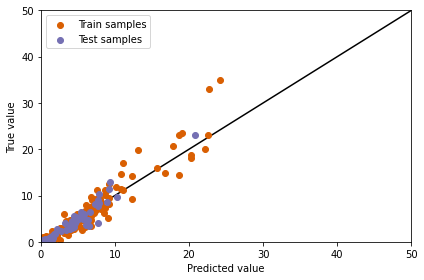

In [18]:
import matplotlib.pyplot as plt

plt.scatter(oof_pred.data[:, 0], train_df[TARGET_NAME].values, label="Train samples", c='#d95f02')
plt.scatter(test_pred.data[:, 0], test_df[TARGET_NAME].values, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([0, 50], [0, 50], c='k', zorder=0)
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.tight_layout()
plt.show()

# Linear Regression

Преобразуем категориальные признаки в числовые и заполним пропуски в данных

In [19]:
train_data = pd.read_csv('/content/car data.csv')
train_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0


In [20]:
train_data.shape

(301, 9)

In [21]:
train_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    2
Kms_Driven       2
Fuel_Type        1
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

# Закодирую категориальные признаки в числовые
le = LabelEncoder()

# Делаем копию данных
new_df = train_data.copy()

car_name = le.fit_transform(train_data['Car_Name'])
fuel_type = le.fit_transform(train_data['Fuel_Type'])
seller_type = le.fit_transform(train_data['Seller_Type'])
transmission = le.fit_transform(train_data['Transmission'])

new_df['Car_Name'] = car_name
new_df['Fuel_Type'] = fuel_type
new_df['Seller_Type'] = seller_type
new_df['Transmission'] = transmission

In [23]:
new_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000.0,2,0,1,0
1,93,2013,4.75,9.54,43000.0,1,0,1,0
2,68,2017,7.25,9.85,6900.0,2,0,1,0
3,96,2011,2.85,4.15,5200.0,2,0,1,0
4,92,2014,4.60,6.87,42450.0,1,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

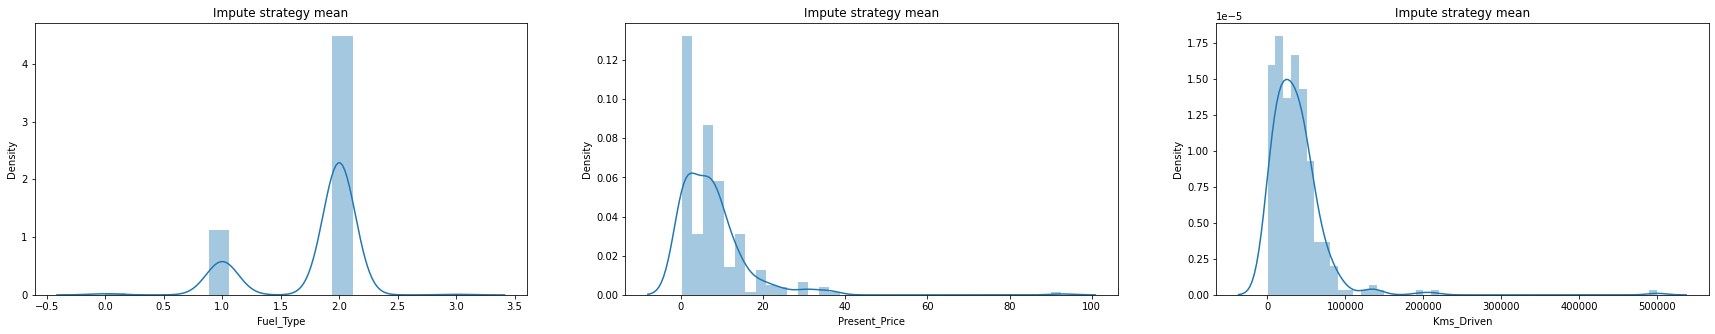

In [24]:
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

mean_imp = SimpleImputer(strategy="mean")

new_df["Fuel_Type"] = mean_imp.fit_transform(new_df[["Fuel_Type"]])
new_df["Present_Price"] = mean_imp.fit_transform(new_df[["Present_Price"]])
new_df["Kms_Driven"] = mean_imp.fit_transform(new_df[["Kms_Driven"]])

fig, ax =plt.subplots(1,3, figsize=(30,5))
ax[0].set_title('Impute strategy mean')
ax[1].set_title('Impute strategy mean')
ax[2].set_title('Impute strategy mean')

sns.distplot(new_df["Fuel_Type"], ax=ax[0])
sns.distplot(new_df["Present_Price"], ax=ax[1])
sns.distplot(new_df["Kms_Driven"], ax=ax[2])

In [25]:
X = new_df.drop([TARGET_NAME], axis=1)
y = new_df[TARGET_NAME]

In [26]:
from sklearn.preprocessing import StandardScaler

columns = X.columns
scaler = StandardScaler()
X_mean = scaler.fit_transform(X)
pd.DataFrame(X_mean, columns=columns).describe()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02
mean,-1.904162e-16,-2.935636e-14,1.103768e-16,1.689309e-16,1.554681e-16,6.085940e-16,1.290957e-17,8.649412e-17
std,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00
min,-2.450800e+00,-3.681621e+00,-8.502754e-01,-9.407945e-01,-4.158475e+00,-7.372854e-01,-2.554408e+00,-1.745006e-01
25%,-6.099024e-01,-5.639244e-01,-7.482393e-01,-5.671153e-01,4.860556e-01,-7.372854e-01,3.914801e-01,-1.745006e-01
50%,2.517945e-01,1.288970e-01,-1.035563e-01,-1.290086e-01,4.860556e-01,-7.372854e-01,3.914801e-01,-1.745006e-01
75%,7.609791e-01,8.217184e-01,2.605272e-01,3.030935e-01,4.860556e-01,1.356327e+00,3.914801e-01,-1.745006e-01
max,1.348500e+00,1.514540e+00,9.849607e+00,1.193181e+01,2.808321e+00,1.356327e+00,3.914801e-01,1.194658e+01


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=88888888)

In [28]:

new_train_df = X_train
new_train_df[TARGET_NAME] = y_train
new_train_df.head()

new_test_df = X_test
new_test_df[TARGET_NAME] = y_test
new_test_df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
55,71,2009,15.04,70000.0,2.0,0,0,0,3.60
151,26,2016,0.55,31000.0,2.0,1,1,0,0.50
160,8,2011,0.95,24000.0,2.0,1,1,0,0.45
180,23,2012,0.51,60000.0,2.0,1,1,0,0.30
94,71,2008,22.78,89000.0,2.0,0,0,0,4.00


In [29]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [30]:
test_predictions = lin_model.predict(X_test)

logging.info('Check scores for test data...')
logging.info('MAE score: {}'.format(mean_absolute_error(test_df[TARGET_NAME].values, test_predictions)))
logging.info('MSE score: {}'.format(mean_squared_error(test_df[TARGET_NAME].values, test_predictions)))
logging.info('MedAE score: {}'.format(median_absolute_error(test_df[TARGET_NAME].values, test_predictions)))
logging.info('R2 score: {}'.format(r2_score(test_df[TARGET_NAME].values, test_predictions)))

[2022-05-02 20:12:46,316] (INFO): Check scores for test data...
[2022-05-02 20:12:46,323] (INFO): MAE score: 1.0925030916360972e-11
[2022-05-02 20:12:46,329] (INFO): MSE score: 2.3717101163732314e-22
[2022-05-02 20:12:46,333] (INFO): MedAE score: 1.0317524612446505e-11
[2022-05-02 20:12:46,337] (INFO): R2 score: 1.0


In [31]:
train_predictions = lin_model.predict(X_train)

logging.info('Check scores for train data...')
logging.info('MAE score: {}'.format(mean_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
logging.info('MSE score: {}'.format(mean_squared_error(train_df[TARGET_NAME].values, train_predictions)))
logging.info('MedAE score: {}'.format(median_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
logging.info('R2 score: {}'.format(r2_score(train_df[TARGET_NAME].values, train_predictions)))

[2022-05-02 20:12:48,915] (INFO): Check scores for train data...
[2022-05-02 20:12:48,928] (INFO): MAE score: 1.0545243844806152e-11
[2022-05-02 20:12:48,934] (INFO): MSE score: 3.8852559289129776e-22
[2022-05-02 20:12:48,940] (INFO): MedAE score: 8.3357765134906e-12
[2022-05-02 20:12:48,949] (INFO): R2 score: 1.0


In [32]:
lin_model.coef_

array([-1.69960805e-16, -9.50151416e-15,  4.65644504e-16, -4.87890978e-16,
       -1.49515619e-15, -2.26939047e-15, -6.41990464e-16, -4.38294982e-16,
        1.00000000e+00])

In [33]:
coefficents = pd.DataFrame(lin_model.coef_, X_train.columns, columns=['Coefficients'])
print(coefficents)

               Coefficients
Car_Name      -1.699608e-16
Year          -9.501514e-15
Present_Price  4.656445e-16
Kms_Driven    -4.878910e-16
Fuel_Type     -1.495156e-15
Seller_Type   -2.269390e-15
Transmission  -6.419905e-16
Owner         -4.382950e-16
Selling_Price  1.000000e+00


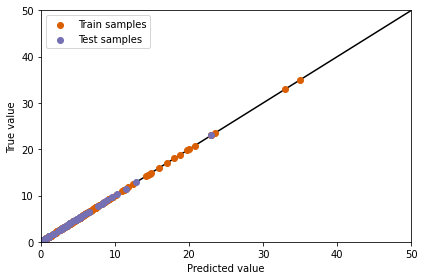

In [34]:
import matplotlib.pyplot as plt

plt.scatter(train_predictions, train_df[TARGET_NAME].values, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_df[TARGET_NAME].values, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([0, 50], [0, 50], c='k', zorder=0)
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.tight_layout()
plt.show()

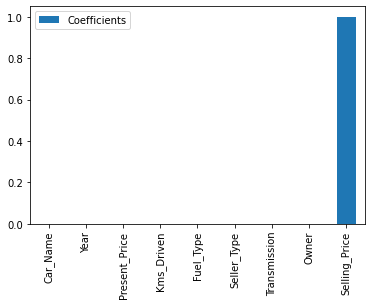

In [35]:
coefficents.plot.bar()

Можно сделать вывод, что данные очень хорошо аппроксимируются прямой линией, то есть наиболее точно опишет выборку модель линейной регрессии.

## TPOT

In [2]:
from tpot import TPOTRegressor

In [1]:
!pip install tpot 

     |████████████████████████████████| 87 kB 2.8 MB/s 
     |████████████████████████████████| 193.7 MB 18 kB/s 
     |████████████████████████████████| 160 kB 43.3 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=5902744a587c07821cea282c198d1ac4b463fccb071eaa2a28819f7dc9f85889
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [4]:
# By default, accuracy is used for classification and mean squared error (MSE) is used for regression.
tpot_settings = dict(verbosity=2, random_state = 1234, warm_start = True)

In [5]:
train_data = pd.read_csv('/content/car data.csv')
train_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0


TPOT не умеет работать с данными, содержащими пропуски и категориальные признаки. Поэтому подготовим данные перед тем, как подать их на вход TPOT

In [7]:
from sklearn.preprocessing import LabelEncoder

# Закодирую категориальные признаки в числовые
le = LabelEncoder()

# Делаем копию данных
new_df = train_data.copy()

car_name = le.fit_transform(train_data['Car_Name'])
fuel_type = le.fit_transform(train_data['Fuel_Type'])
seller_type = le.fit_transform(train_data['Seller_Type'])
transmission = le.fit_transform(train_data['Transmission'])

new_df['Car_Name'] = car_name
new_df['Fuel_Type'] = fuel_type
new_df['Seller_Type'] = seller_type
new_df['Transmission'] = transmission

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
[2022-05-02 20:17:50,358] (INFO): NumExpr defaulting to 2 threads.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functi

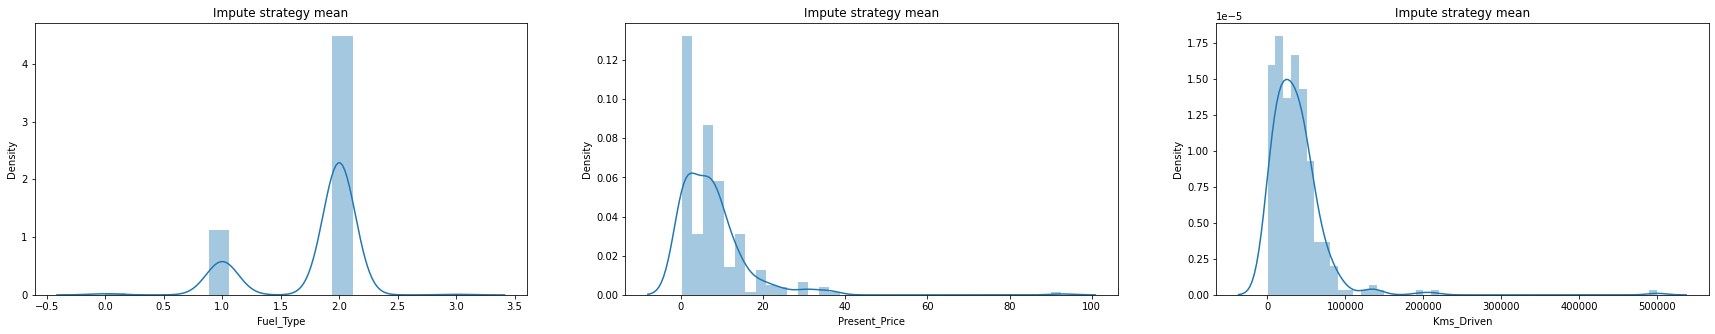

In [8]:
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

mean_imp = SimpleImputer(strategy="mean")

new_df["Fuel_Type"] = mean_imp.fit_transform(new_df[["Fuel_Type"]])
new_df["Present_Price"] = mean_imp.fit_transform(new_df[["Present_Price"]])
new_df["Kms_Driven"] = mean_imp.fit_transform(new_df[["Kms_Driven"]])

fig, ax =plt.subplots(1,3, figsize=(30,5))
ax[0].set_title('Impute strategy mean')
ax[1].set_title('Impute strategy mean')
ax[2].set_title('Impute strategy mean')

sns.distplot(new_df["Fuel_Type"], ax=ax[0])
sns.distplot(new_df["Present_Price"], ax=ax[1])
sns.distplot(new_df["Kms_Driven"], ax=ax[2])

In [ ]:
new_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000.0,2.0,0,1,0
1,93,2013,4.75,9.54,43000.0,1.0,0,1,0
2,68,2017,7.25,9.85,6900.0,2.0,0,1,0
3,96,2011,2.85,4.15,5200.0,2.0,0,1,0
4,92,2014,4.60,6.87,42450.0,1.0,0,1,0


In [11]:
X = new_df.drop([TARGET_NAME], axis=1)
y = new_df[TARGET_NAME]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=88888888)

new_train_df = X_train
new_train_df[TARGET_NAME] = y_train
new_train_df.head()

new_test_df = X_test
new_test_df[TARGET_NAME] = y_test
new_test_df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
55,71,2009,15.04,70000.0,2.0,0,0,0,3.60
151,26,2016,0.55,31000.0,2.0,1,1,0,0.50
160,8,2011,0.95,24000.0,2.0,1,1,0,0.45
180,23,2012,0.51,60000.0,2.0,1,1,0,0.30
94,71,2008,22.78,89000.0,2.0,0,0,0,4.00


In [12]:
%%time
auto_reg = TPOTRegressor(generations=2, population_size=5, **tpot_settings)

CPU times: user 40 µs, sys: 7 µs, total: 47 µs
Wall time: 51.5 µs


In [13]:
auto_reg.fit(new_df.drop(TARGET_NAME,1), new_df[TARGET_NAME])

Optimization Progress:   0%|          | 0/15 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -4.340803893513998

Generation 2 - Current best internal CV score: -4.333878725028628

Best pipeline: XGBRegressor(LinearSVR(input_matrix, C=0.01, dual=False, epsilon=0.1, loss=squared_epsilon_insensitive, tol=1e-05), learning_rate=0.5, max_depth=2, min_child_weight=9, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0)


TPOTRegressor(generations=2, population_size=5, random_state=1234, verbosity=2,
              warm_start=True)

In [15]:
test_predictions = auto_reg.predict(new_test_df.drop(TARGET_NAME,1))

logging.info('Check scores for test data...')
logging.info('MAE score: {}'.format(mean_absolute_error(new_test_df[TARGET_NAME].values, test_predictions)))
logging.info('MSE score: {}'.format(mean_squared_error(new_test_df[TARGET_NAME].values, test_predictions)))
logging.info('MedAE score: {}'.format(median_absolute_error(new_test_df[TARGET_NAME].values, test_predictions)))
logging.info('R2 score: {}'.format(r2_score(new_test_df[TARGET_NAME].values, test_predictions)))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  "X does not have valid feature names, but"
[2022-05-02 20:27:17,958] (INFO): Check scores for test data...
[2022-05-02 20:27:17,961] (INFO): MAE score: 0.2842355903641123
[2022-05-02 20:27:17,964] (INFO): MSE score: 0.14132591459709676
[2022-05-02 20:27:17,968] (INFO): MedAE score: 0.22187814712524423
[2022-05-02 20:27:17,971] (INFO): R2 score: 0.9906406994898754


In [16]:
train_predictions = auto_reg.predict(new_train_df.drop(TARGET_NAME,1))

logging.info('Check scores for train data...')
logging.info('MAE score: {}'.format(mean_absolute_error(new_train_df[TARGET_NAME].values, train_predictions)))
logging.info('MSE score: {}'.format(mean_squared_error(new_train_df[TARGET_NAME].values, train_predictions)))
logging.info('MedAE score: {}'.format(median_absolute_error(new_train_df[TARGET_NAME].values, train_predictions)))
logging.info('R2 score: {}'.format(r2_score(new_train_df[TARGET_NAME].values, train_predictions)))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  "X does not have valid feature names, but"
[2022-05-02 20:27:43,398] (INFO): Check scores for train data...
[2022-05-02 20:27:43,402] (INFO): MAE score: 0.3812950575929135
[2022-05-02 20:27:43,414] (INFO): MSE score: 0.34010471248822977
[2022-05-02 20:27:43,417] (INFO): MedAE score: 0.22438755750656114
[2022-05-02 20:27:43,421] (INFO): R2 score: 0.9880210052861944


In [17]:
# Get the best model
exctracted_best_model = auto_reg.fitted_pipeline_.steps[-1][1]

print(exctracted_best_model)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=9,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=1,
             num_parallel_tree=1, predictor='auto', random_state=1234,
             reg_alpha=0, reg_lambda=1, ...)


In [18]:
# Access it's features
exctracted_best_model.feature_importances_

array([0.405926  , 0.01031797, 0.05533714, 0.30651212, 0.02423376,
       0.17671807, 0.        , 0.02095495, 0.        ], dtype=float32)

In [19]:
coefficents = pd.DataFrame(exctracted_best_model.feature_importances_, X_train.columns, columns=['Coefficients'])
print(coefficents)

               Coefficients
Car_Name           0.405926
Year               0.010318
Present_Price      0.055337
Kms_Driven         0.306512
Fuel_Type          0.024234
Seller_Type        0.176718
Transmission       0.000000
Owner              0.020955
Selling_Price      0.000000


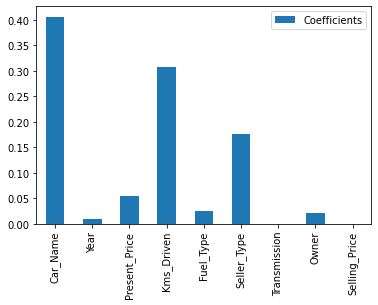

In [20]:
coefficents.plot.bar()

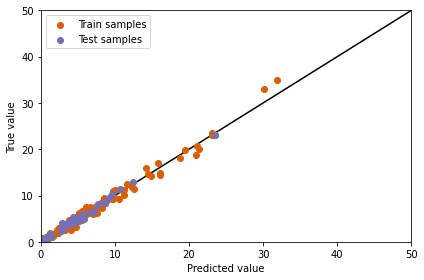

In [22]:
import matplotlib.pyplot as plt

plt.scatter(train_predictions, new_train_df[TARGET_NAME].values, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, new_test_df[TARGET_NAME].values, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([0, 50], [0, 50], c='k', zorder=0)
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.tight_layout()
plt.show()

### Auto-sklearn

In [1]:
!pip3 install auto-sklearn

In [2]:
import autosklearn.regression

In [4]:
train_data = pd.read_csv('/content/car data.csv')
train_data.head()

TARGET_NAME = "Selling_Price"

X = train_data.drop(["Selling_Price"], axis=1)
y = train_data["Selling_Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=88888888)
train_df = X_train
train_df[TARGET_NAME] = y_train
test_df = X_test
test_df[TARGET_NAME] = y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [5]:
train_df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
150,TVS Apache RTR 180,2011,0.826,6000.0,Petrol,Individual,Manual,0,0.50
8,ciaz,2016,8.890,20273.0,Diesel,Dealer,Manual,0,8.75
4,swift,2014,6.870,42450.0,Diesel,Dealer,Manual,0,4.60
139,Bajaj Avenger 220 dtsi,2015,0.950,16600.0,Petrol,Individual,Manual,0,0.60
58,etios g,2014,6.800,39485.0,Petrol,Dealer,Manual,1,4.10


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 150 to 127
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       240 non-null    object 
 1   Year           240 non-null    int64  
 2   Present_Price  238 non-null    float64
 3   Kms_Driven     238 non-null    float64
 4   Fuel_Type      239 non-null    object 
 5   Seller_Type    240 non-null    object 
 6   Transmission   240 non-null    object 
 7   Owner          240 non-null    int64  
 8   Selling_Price  240 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 18.8+ KB


In [7]:
train_df['Car_Name'] = train_df['Car_Name'].astype('category')
train_df['Fuel_Type'] = train_df['Fuel_Type'].astype('category')
train_df['Seller_Type'] = train_df['Seller_Type'].astype('category')
train_df['Transmission'] = train_df['Transmission'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 150 to 127
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       240 non-null    category
 1   Year           240 non-null    int64   
 2   Present_Price  238 non-null    float64 
 3   Kms_Driven     238 non-null    float64 
 4   Fuel_Type      239 non-null    category
 5   Seller_Type    240 non-null    category
 6   Transmission   240 non-null    category
 7   Owner          240 non-null    int64   
 8   Selling_Price  240 non-null    float64 
dtypes: category(4), float64(3), int64(2)
memory usage: 15.7 KB


In [9]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/content/autosklearn_regression_example_tmp3',
    n_jobs=5
)
# Input Column Car_Name has invalid type object. Cast it to a valid dtype before using it in Auto-Sklearn. Valid types are numerical, categorical or boolean.
# object - str ---> category
automl.fit(train_df.drop(TARGET_NAME,1), train_df[TARGET_NAME], dataset_name='car data')

AutoSklearnRegressor(n_jobs=5, per_run_time_limit=30,
                     time_left_for_this_task=120,
                     tmp_folder='/content/autosklearn_regression_example_tmp3')

In [10]:
print(automl.leaderboard())

          rank  ensemble_weight              type      cost   duration
model_id                                                              
10           1             0.50        libsvm_svr  0.030193   4.417563
18           2             0.08     random_forest  0.038947  29.744234
2            3             0.06     random_forest  0.041350   8.554002
24           4             0.24  gaussian_process  0.042079  12.287513
27           5             0.10       extra_trees  0.068159   7.329592
19           6             0.02       extra_trees  0.078041   9.953738


In [11]:
print(automl.show_models())

{10: {'model_id': 10, 'rank': 1, 'cost': 0.030192872090217038, 'ensemble_weight': 0.5000000000000001, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f9c3f908050>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f9c4435ce10>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7f9c3f8f15d0>, 'sklearn_regressor': SVR(C=1.4272136443763257, cache_size=1961.1640625, coef0=0.2694141260648879,
    degree=2, epsilon=0.10000000000000006, gamma=0.05757315877344016,
    kernel='poly', shrinking=False, tol=0.0010000000000000002, verbose=0)}, 18: {'model_id': 18, 'rank': 2, 'cost': 0.038946837332875406, 'ensemble_weight': 0.08000000000000002, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f9c3f463f10>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preproces

In [12]:
test_predictions = automl.predict(test_df.drop(TARGET_NAME,1))

print('Check scores for test data...')
print('MAE score: {}'.format(mean_absolute_error(test_df[TARGET_NAME].values, test_predictions)))
print('MSE score: {}'.format(mean_squared_error(test_df[TARGET_NAME].values, test_predictions)))
print('MedAE score: {}'.format(median_absolute_error(test_df[TARGET_NAME].values, test_predictions)))
print('R2 score: {}'.format(r2_score(test_df[TARGET_NAME].values, test_predictions)))

train_predictions = automl.predict(train_df.drop(TARGET_NAME,1))

print('Check scores for train data...')
print('MAE score: {}'.format(mean_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
print('MSE score: {}'.format(mean_squared_error(train_df[TARGET_NAME].values, train_predictions)))
print('MedAE score: {}'.format(median_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
print('R2 score: {}'.format(r2_score(train_df[TARGET_NAME].values, train_predictions)))

Check scores for test data...
MAE score: 0.5220690445229412
MSE score: 0.5679085655540281
MedAE score: 0.3620856960862875
R2 score: 0.9623902881333052


In [13]:
train_predictions = automl.predict(train_df.drop(TARGET_NAME,1))

print('Check scores for train data...')
print('MAE score: {}'.format(mean_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
print('MSE score: {}'.format(mean_squared_error(train_df[TARGET_NAME].values, train_predictions)))
print('MedAE score: {}'.format(median_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
print('R2 score: {}'.format(r2_score(train_df[TARGET_NAME].values, train_predictions)))

Check scores for train data...
MAE score: 0.4872730753789656
MSE score: 0.7822452964342453
MedAE score: 0.2827391846105456
R2 score: 0.9724481551510127


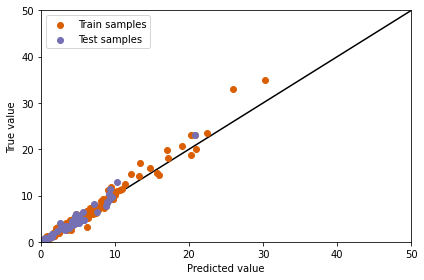

In [14]:
import matplotlib.pyplot as plt

plt.scatter(train_predictions, train_df[TARGET_NAME].values, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_df[TARGET_NAME].values, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([0, 50], [0, 50], c='k', zorder=0)
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.tight_layout()
plt.show()

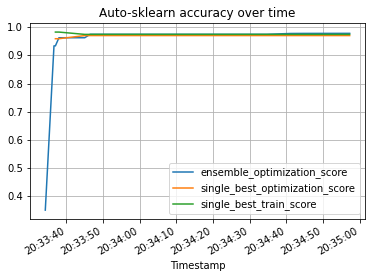

In [15]:
poT = automl.performance_over_time_
poT.plot(
    x='Timestamp',
    kind='line',
    legend=True,
    title='Auto-sklearn accuracy over time',
    grid=True,
)
plt.show()

In [16]:
# summarize
# At the end of the run, a summary is printed showing that 20 models were evaluated and the estimated performance of the final model was 97.1 percent.
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: car data
  Metric: r2
  Best validation score: 0.969807
  Number of target algorithm runs: 28
  Number of successful target algorithm runs: 22
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 6
  Number of target algorithms that exceeded the memory limit: 0



## H2O AutoML

In [1]:
!pip install h2o

     |████████████████████████████████| 177.0 MB 14 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.1-py2.py3-none-any.whl size=177068062 sha256=fcb2ceac61193ae1bc4cdae328967b8438f67932a097da0fc538001d2b319d81
  Stored in directory: /root/.cache/pip/wheels/a6/d9/ab/5442447c7e2ccf07f66aa8b79f3877ce5382f0b95e6c0c797b
Successfully built h2o


In [2]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmppf4ak7g8
  JVM stdout: /tmp/tmppf4ak7g8/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmppf4ak7g8/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_0832wr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
data = h2o.import_file('/content/car data.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
data.describe()

Rows:301
Cols:9




,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
type,enum,int,real,real,int,enum,enum,enum,int
mins,,2003.0,0.1,0.32,500.0,,,,0.0
mean,,2013.6279069767434,4.661295681063125,7.653110367892976,37005.96321070232,,,,0.04318936877076412
maxs,,2018.0,35.0,92.6,500000.0,,,,3.0
sigma,,2.8915541273367253,5.082811556177804,8.667696611452245,38998.164552343515,,,,0.2479148926949197
zeros,,0,0,0,0,,,,290
missing,0,0,0,2,2,1,0,0,0
0,ritz,2014.0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0
1,sx4,2013.0,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0
2,ciaz,2017.0,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0


In [9]:
splits = data.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

y = TARGET_NAME

In [10]:
len(train)

246

In [ ]:
splits[0]

Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
swift,2014,4.6,6.87,42450,Diesel,Dealer,Manual,0
vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
s cross,2015,6.5,8.61,33429,Diesel,Dealer,Manual,0
ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
alto 800,2017,2.85,3.6,2135,Petrol,Dealer,Manual,0
ciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual,0


In [ ]:
splits[1]

Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0
alto k10,2016,2.85,3.95,25000,Petrol,Dealer,Manual,0
800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0
fortuner,2015,23,30.61,40000,Diesel,Dealer,Automatic,0
corolla altis,2009,3.6,15.04,70000,Petrol,Dealer,Automatic,0
fortuner,2015,23.5,35.96,47000,Diesel,Dealer,Automatic,0
fortuner,2017,33,36.23,6000,Diesel,Dealer,Automatic,0
corolla altis,2013,7.45,18.61,56001,Petrol,Dealer,Manual,0


In [11]:
aml = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "cars_frame")
aml.train(y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |████
20:56:38.347: GBM_1_AutoML_1_20220502_205631 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_1_20220502_205631.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 196.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 197.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 197.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 197.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 197.0.


███████████████████████████████████

,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,113,Input,20,,,,,,,,,
1,,2,50,RectifierDropout,40,0,0,0.527118,0.45065,0,0.000580427,0.110146,0.423009,0.104555
2,,3,1,Linear,,0,0,0.00340742,0.00105238,0,0.0101654,0.204131,-0.0190188,1.09713e-154




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 4.062712672705011
RMSE: 2.0156171939892285
MAE: 1.359543396803466
RMSLE: NaN
Mean Residual Deviance: 4.062712672705011

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 3.4309069561794803
RMSE: 1.852270756714439
MAE: 1.3630483560506572
RMSLE: 0.4390900847893517
Mean Residual Deviance: 3.4309069561794803

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.437746,0.364557,1.371427,1.384467,1.311418,2.049673,1.071746
1,mean_residual_deviance,3.630315,1.907741,2.712946,3.268454,3.056693,6.958805,2.154679
2,mse,3.630315,1.907741,2.712946,3.268454,3.056693,6.958805,2.154679
3,r2,0.763313,0.243163,0.860287,0.870366,0.878826,0.328541,0.878545
4,residual_deviance,3.630315,1.907741,2.712946,3.268454,3.056693,6.958805,2.154679
5,rmse,1.861833,0.452621,1.647102,1.807887,1.748340,2.637955,1.467882
6,rmsle,0.451688,0.058432,0.458802,0.471509,0.416679,0.533042,0.378411



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-05-02 20:57:29,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2022-05-02 20:57:29,4.235 sec,23500 obs/sec,0.764228,1,188.0,2.015617,4.062713,1.359543,0.794121



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Car_Name.Honda Karizma,1.000000,1.000000,0.011135
1,Car_Name.s cross,0.988078,0.988078,0.011003
2,Car_Name.city,0.984303,0.984303,0.010961
3,Car_Name.brio,0.962235,0.962235,0.010715
4,Car_Name.etios g,0.955554,0.955554,0.010641
5,Car_Name.Royal Enfield Classic 350,0.937060,0.937060,0.010435
6,Car_Name.Hero Extreme,0.935264,0.935264,0.010415
7,Car_Name.Yamaha FZ 16,0.929412,0.929412,0.010349
8,Fuel_Type.Diesel,0.928183,0.928183,0.010336
9,Car_Name.Honda Activa 125,0.924600,0.924600,0.010296



See the whole table with table.as_data_frame()


A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric.
Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the H2OAutoML.train() method for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

In [12]:
aml.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_1_20220502_205631_model_2,1.7618,3.10394,0.963485,0.257285,3.10394
DeepLearning_1_AutoML_1_20220502_205631,2.11552,4.47544,1.30468,0.403414,4.47544
GLM_1_AutoML_1_20220502_205631,2.39137,5.71864,1.33982,nan,5.71864
DeepLearning_grid_1_AutoML_1_20220502_205631_model_1,2.47586,6.12987,1.35507,nan,6.12987
StackedEnsemble_BestOfFamily_4_AutoML_1_20220502_205631,2.49903,6.24513,0.857456,0.162084,6.24513
StackedEnsemble_BestOfFamily_1_AutoML_1_20220502_205631,2.78614,7.76259,1.14221,0.265283,7.76259
XGBoost_grid_1_AutoML_1_20220502_205631_model_3,2.97352,8.84184,0.960286,0.148548,8.84184
StackedEnsemble_BestOfFamily_3_AutoML_1_20220502_205631,3.09453,9.57615,0.98904,0.169473,9.57615
XGBoost_grid_1_AutoML_1_20220502_205631_model_4,3.19272,10.1934,1.04815,0.184146,10.1934
StackedEnsemble_AllModels_2_AutoML_1_20220502_205631,3.39998,11.5599,0.951689,0.178784,11.5599


In [13]:
test_predictions = aml.predict(test)
test_predictions.head()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


predict
7.06336
7.40978
3.47279
0.281015
1.75057
18.9575
5.85282
20.9131
22.7381
7.84545


In [14]:
perf = aml.leader.model_performance(test)
perf


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 3.1039402040082904
RMSE: 1.7618002735861662
MAE: 0.9634853996107683
RMSLE: 0.25728479206658184
Mean Residual Deviance: 3.1039402040082904


In [15]:
train_predictions = aml.predict(train)
perf = aml.leader.model_performance(train)
perf

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 1.2901619250321144
RMSE: 1.1358529504439008
MAE: 0.7746086368392664
RMSLE: NaN
Mean Residual Deviance: 1.2901619250321144


In [16]:
print('Check scores for test data...')
print('MAE score: {}'.format(mean_absolute_error(test.as_data_frame()[TARGET_NAME].values, test_predictions.as_data_frame().values)))
print('MSE score: {}'.format(mean_squared_error(test.as_data_frame()[TARGET_NAME].values, test_predictions.as_data_frame().values)))
print('MedAE score: {}'.format(median_absolute_error(test.as_data_frame()[TARGET_NAME].values, test_predictions.as_data_frame().values)))
print('R2 score: {}'.format(r2_score(test.as_data_frame()[TARGET_NAME].values, test_predictions.as_data_frame().values)))

print('Check scores for train data...')
print('MAE score: {}'.format(mean_absolute_error(train.as_data_frame()[TARGET_NAME].values, train_predictions.as_data_frame().values)))
print('MSE score: {}'.format(mean_squared_error(train.as_data_frame()[TARGET_NAME].values, train_predictions.as_data_frame().values)))
print('MedAE score: {}'.format(median_absolute_error(train.as_data_frame()[TARGET_NAME].values, train_predictions.as_data_frame().values)))
print('R2 score: {}'.format(r2_score(train.as_data_frame()[TARGET_NAME].values, train_predictions.as_data_frame().values)))

Check scores for test data...
MAE score: 0.9634853888169091
MSE score: 3.1039401821959487
MedAE score: 0.49943231091994056
R2 score: 0.9408256534859903
Check scores for train data...
MAE score: 0.7746086449876576
MSE score: 1.2901619409151566
MedAE score: 0.5456018411397815
R2 score: 0.9346207349922265


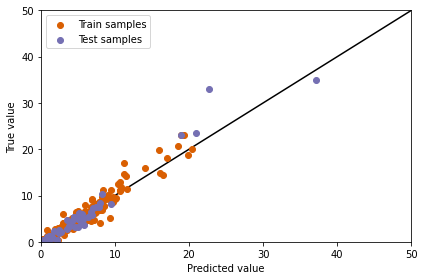

In [17]:
import matplotlib.pyplot as plt

plt.scatter(train_predictions.as_data_frame().values, train[y].as_data_frame().values, label="Train samples", c='#d95f02')
plt.scatter(test_predictions.as_data_frame().values, test[y].as_data_frame().values, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([0, 50], [0, 50], c='k', zorder=0)
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.tight_layout()
plt.show()

### Mljar

In [1]:
!pip install mljar-supervised

     |████████████████████████████████| 113 kB 7.7 MB/s 
     |████████████████████████████████| 11.3 MB 39.8 MB/s 
     |████████████████████████████████| 24.8 MB 20.5 MB/s 
     |████████████████████████████████| 2.0 MB 36.7 MB/s 
     |████████████████████████████████| 61 kB 200 kB/s 
     |████████████████████████████████| 319 kB 39.9 MB/s 
     |████████████████████████████████| 366 kB 41.4 MB/s 
     |████████████████████████████████| 86 kB 2.1 MB/s 
  Created wheel for mljar-supervised: filename=mljar_supervised-0.11.2-py3-none-any.whl size=146575 sha256=66bab177fb2905a9511c0123482dac4174522fc455eb34b085c2d895be615b91
  Stored in directory: /root/.cache/pip/wheels/4f/67/ed/479dbde33806ee15f1611a7ff54b9db565076be8acf2ef2d29
  Created wheel for shap: filename=shap-0.36.0-cp37-cp37m-linux_x86_64.whl size=457670 sha256=0e126cd293ce97c9a53eb7d7e2c3ea53dca9de2f034efcbc87dcf0ccb45b1e6c
  Stored in directory: /root/.cache/pip/wheels/6b/1e/4a/b1d65778aac48b677ac2a758251f9cccb338775e8d174

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from supervised.automl import AutoML # mljar-supervised

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [3]:
train_data = pd.read_csv('/content/car data.csv')
train_data.head()

TARGET_NAME = "Selling_Price"

X = train_data.drop(["Selling_Price"], axis=1)
y = train_data["Selling_Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=88888888)
train_df = X_train
train_df[TARGET_NAME] = y_train
test_df = X_test
test_df[TARGET_NAME] = y_test

In [4]:
# train models with AutoML
automl = AutoML(mode="Explain")
automl.fit(train_df.drop(TARGET_NAME,1), train_df[TARGET_NAME])

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline rmse 4.108672 trained in 1.25 seconds
2_DecisionTree rmse 2.0329 trained in 17.89 seconds
3_Linear rmse 1.516607 trained in 4.67 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost rmse 0.810451 trained in 6.51 seconds
5_Default_NeuralNetwork rmse 1.327248 trained in 0.72 seconds
6_Default_RandomForest rmse 1.453835 trained in 5.65 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.795822 trained in 0.35 seconds
AutoML fit time: 47.06 seconds
AutoML best model: Ensemble


AutoML()

In [7]:
test_predictions = automl.predict(X_test)

print('Check scores...')
print('MAE score: {}'.format(mean_absolute_error(test_df[TARGET_NAME].values, test_predictions)))
print('MSE score: {}'.format(mean_squared_error(test_df[TARGET_NAME].values, test_predictions)))
print('RMSE score: {}'.format(mean_squared_error(test_df[TARGET_NAME].values, test_predictions, squared=False)))
print('MedAE score: {}'.format(median_absolute_error(test_df[TARGET_NAME].values, test_predictions)))
print('R2 score: {}'.format(r2_score(test_df[TARGET_NAME].values, test_predictions)))

train_predictions = automl.predict(X_train)

print('Check scores...')
print('MAE score: {}'.format(mean_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
print('MSE score: {}'.format(mean_squared_error(train_df[TARGET_NAME].values, train_predictions)))
print('RMSE score: {}'.format(mean_squared_error(train_df[TARGET_NAME].values, train_predictions, squared=False)))
print('MedAE score: {}'.format(median_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
print('R2 score: {}'.format(r2_score(train_df[TARGET_NAME].values, train_predictions)))

Check scores...
MAE score: 0.49083217569651266
MSE score: 0.44248388508479464
RMSE score: 0.665194621960216
MedAE score: 0.3428871092873722
R2 score: 0.9706965303341395


In [8]:
train_predictions = automl.predict(X_train)

In [9]:
print('Check scores...')
print('MAE score: {}'.format(mean_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
print('MSE score: {}'.format(mean_squared_error(train_df[TARGET_NAME].values, train_predictions)))
print('RMSE score: {}'.format(mean_squared_error(train_df[TARGET_NAME].values, train_predictions, squared=False)))
print('MedAE score: {}'.format(median_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
print('R2 score: {}'.format(r2_score(train_df[TARGET_NAME].values, train_predictions)))

Check scores...
MAE score: 0.2567551287356966
MSE score: 0.2215209191406906
RMSE score: 0.4706600887484413
MedAE score: 0.12854949599893106
R2 score: 0.9921977031721502


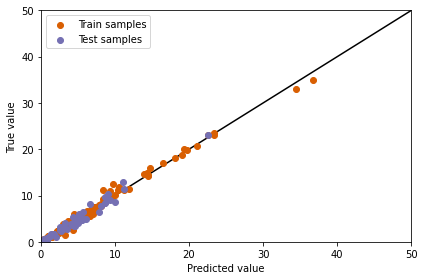

In [10]:
import matplotlib.pyplot as plt

plt.scatter(train_predictions, train_df[TARGET_NAME].values, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_df[TARGET_NAME].values, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([0, 50], [0, 50], c='k', zorder=0)
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.tight_layout()
plt.show()

# Отобразим на гистограммах значение для каждой метрики для каждой исследованной системе AutoML

In [ ]:
# For train dataset
import pandas as pd
 
data = [['LAMA', 1.0565259723737837, 'MAE'], ['TPOT', 0.3812950575929135, 'MAE'], ['Auto-sklearn', 0.46988642746210096, 'MAE'], ['H2O', 0.9801410993147189, 'MAE'], ['Mljar', 0.2567551287356966, 'MAE'], ['Linear Regression', 1.0545243844806152e-11, 'MAE'],
         ['LAMA', 3.1754962807345968, 'MSE'], ['TPOT', 0.34010471248822977, 'MSE'], ['Auto-sklearn', 0.6575754064520546, 'MSE'], ['H2O', 1.5158275831658798, 'MSE'], ['Mljar', 0.2215209191406906, 'MSE'], ['Linear Regression', 3.8852559289129776e-22, 'MSE'],
         ['LAMA', 0.6251708030700683, 'MedAE'], ['TPOT', 0.22438755750656114, 'MedAE'], ['Auto-sklearn', 0.2721466407179832, 'MedAE'], ['H2O', 0.8301244012830309, 'MedAE'], ['Mljar', 0.12854949599893106, 'MedAE'], ['Linear Regression', 8.3357765134906e-12, 'MedAE'],
         ['LAMA', 0.8881542896529384, 'R2'], ['TPOT', 0.9880210052861944, 'R2'], ['Auto-sklearn', 0.9768392144284377, 'R2'], ['H2O', 0.9231850745840502, 'R2'], ['Mljar', 0.9706965303341395, 'R2'], ['Linear Regression', 1.0, 'R2']]


# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Name', 'Metric Values', 'Metric'])
 
# print dataframe.
df

,Name,Metric Values,Metric
0,LAMA,1.056526e+00,MAE
1,TPOT,3.812951e-01,MAE
2,Auto-sklearn,4.698864e-01,MAE
3,H2O,9.801411e-01,MAE
4,Mljar,2.567551e-01,MAE
5,Linear Regression,1.054524e-11,MAE
6,LAMA,3.175496e+00,MSE
7,TPOT,3.401047e-01,MSE
8,Auto-sklearn,6.575754e-01,MSE
9,H2O,1.515828e+00,MSE


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


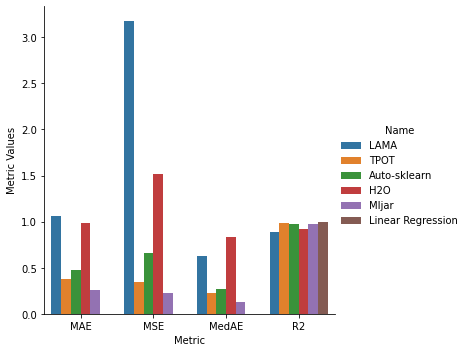

In [ ]:
import seaborn as sns

sns.factorplot(x='Metric', y='Metric Values', hue='Name', data=df, kind='bar')

In [11]:
# For test dataset
import pandas as pd
 
# initialize list of lists
data = [['LAMA', 0.829936069377133, 'MAE'], ['TPOT', 0.2842355903641123, 'MAE'], ['Auto-sklearn', 2.209233888010246, 'MAE'], ['H2O', 1.3195893775079222, 'MAE'], ['Mljar', 0.49083217569651266, 'MAE'], ['Linear Regression', 1.0925030916360972e-11, 'MAE'],
         ['LAMA', 1.3869212805008564, 'MSE'], ['TPOT', 0.14132591459709676, 'MSE'], ['Auto-sklearn', 9.757657659489887, 'MSE'], ['H2O', 4.661805179308799, 'MSE'], ['Mljar', 0.44248388508479464, 'MSE'], ['Linear Regression', 2.3717101163732314e-22, 'MSE'],
         ['LAMA', 0.5823495864868162, 'MedAE'], ['TPOT', 0.22187814712524423, 'MedAE'], ['Auto-sklearn', 1.7109040069580033, 'MedAE'], ['H2O', 0.9364413008704968, 'MedAE'], ['Mljar', 0.3428871092873722, 'MedAE'], ['Linear Regression', 1.0317524612446505e-11, 'MedAE'],
         ['LAMA', 0.9081512185143081, 'R2'], ['TPOT', 0.9906406994898754, 'R2'], ['Auto-sklearn', 0.966213885775302, 'R2'], ['H2O', 0.9111260981627354, 'R2'], ['Mljar', 0.9706965303341395, 'R2'], ['Linear Regression', 1.0, 'R2']]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Name', 'Metric Values', 'Metric'])
 
# print dataframe.
df

,Name,Metric Values,Metric
0,LAMA,8.299361e-01,MAE
1,TPOT,2.842356e-01,MAE
2,Auto-sklearn,2.209234e+00,MAE
3,H2O,1.319589e+00,MAE
4,Mljar,4.908322e-01,MAE
5,Linear Regression,1.092503e-11,MAE
6,LAMA,1.386921e+00,MSE
7,TPOT,1.413259e-01,MSE
8,Auto-sklearn,9.757658e+00,MSE
9,H2O,4.661805e+00,MSE


The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


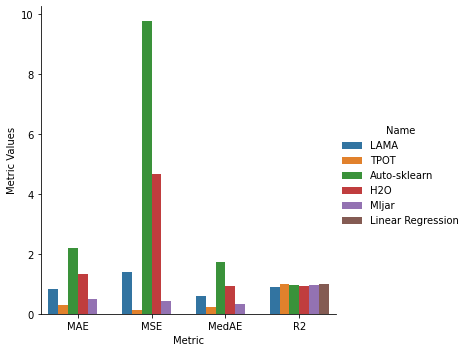

In [12]:
import seaborn as sns

sns.factorplot(x='Metric', y='Metric Values', hue='Name', data=df, kind='bar')